<a href="https://colab.research.google.com/github/semthedev/ml-course-2025/blob/main/seminars/04_sklearn_clean_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jupyter_black

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00


In [ ]:
!pip install seaborn

In [ ]:
%load_ext jupyter_black

# scikit-learn

Главная библиотека для классического ML. Сегодня ознакомимся с основным пайплайном на примере задачи бинарной классификации табличных данных.

В sklearn есть очень качественный, проиллюстрированный кодом [мануал](https://scikit-learn.org/stable/index.html), который способен заменить учебник по "ML для практиков".

## Бинарная классификация
Датасет состоит из пар $(x,y)$, где $y$ - "правильный класс". **Бинарная** классификация - это когда у $y$ всего два значения, кодируемые как 0 или 1.

**N.B.** Часто в подобных ситуациях это "присутствие" или "отсутсвие" какого-то признака. Такая формулировка не влияет на суть происходящего, но позволяет лучше понять мотивацию некоторых концептов ниже. А еще она нужно, конгда мы будем обобщать штуки из сегодняшнего урока на случай нескольких классов. Одна из основных идей - относиться к проблеме классификации с $K$ классами как $K$ задачам бинарной: предсказываем (конкретный класс) vs (остальные).


Про датасет мы предполагаем что $x$ - фиксированы (они будут всегда появляться только справа от черты во всех условных вероятностях), а $y$ - независимо порождены из некоторого *истинного* распределения $P(y|x)$.

## Метрики классификации

Начнем с того, что научимся оценивать уже имеющиеся предсказания, то есть оценка $\hat P(y|x)$.

In [ ]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(
    {
        "id": list(range(1, 8)),
        "score": [
            0.5,
            0.1,
            0.2,
            0.6,
            0.2,
            0.3,
            0.0,
        ],  # так обычно выглядит выход из бинарного классификатора
        "class": [0, 0, 0, 1, 1, 1, 0],  # "правильные" метки
    }
)

df.head(7)

,id,score,class
0,1,0.5,0
1,2,0.1,0
2,3,0.2,0
3,4,0.6,1
4,5,0.2,1
5,6,0.3,1
6,7,0.0,0


## TP, TN, FP, FN, confusion matrix

В бинарной классификации для каждого наблюдаемого бывает всего 4 ситуации, и у каждой свое название. Похоже, что это пришло из Statistical hypothesis testing, где есть "нулевая гипотеза" (верная или неверная) и результат статистического теста (отвергнуть гипотезу, или принять).


True Positive - предсказано 1, метка -- 1

True Negative - предсказано 0, метка -- 0

False Positive (a.k.a ошибка первого рода) - предсказано 1, метка -- 0

False Negative (a.k.a ошибка второго рода) - предсказано 0, метка -- 1

## Через эти ошибки можно выразить целое семейство метрик бинарной классификации:

**Accuracy** -- доля верно классифицированных точек данных

**Recall** -- доля точек данных предсказанного первого класса среди истинного первого класса

**Precision** -- наоборот, доля точек данных, которые принадлежат истинному первому классу среди тех, что модель отнесла к нему

**F1-score** -- среднее гармоническое точности и полноты

Упражнение: выразить через TP, TN, FP, FN.

accuracy = ...

recall = ...

precision = ...

f1 = ...

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{F1} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2TP}{2TP + FP + FN}
$$


#### One-vs-Rest
Представим на секунду, что у нас не два класса, а, скажем, N.

Как мне обобщить полученные метрики на этот случай?

* macro averaging
* weighted averaging
* micro averaging

### Confusion matrix

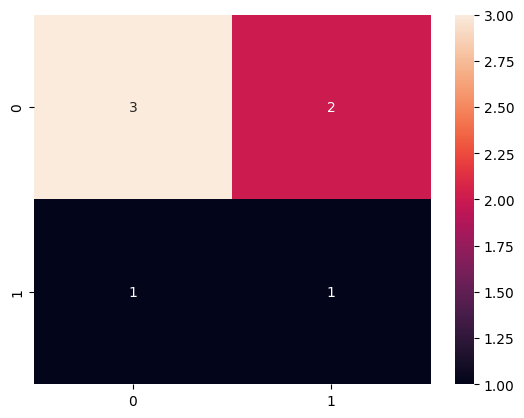

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# это уже не только для бинарной классификации, можно построить confusion matrix для любого числа классов
sns.heatmap(
    confusion_matrix(df["score"] >= 0.5, df["class"]),  # а почему 0.5?
    annot=True,
    fmt="g",
);

Конечно, все метрики уже есть в библиотеке. Давайте проверим ваши формулы.

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

df[">2"] = df["score"].map(lambda x: 1 if x >= 0.2 else 0)
df  # .drop("score", axis=1)

,id,score,class,>2
0,1,0.5,0,1
1,2,0.1,0,0
2,3,0.2,0,1
3,4,0.6,1,1
4,5,0.2,1,1
5,6,0.3,1,1
6,7,0.0,0,0


In [ ]:
TP = len(df[(df[">2"] == 1) & (df["class"] == 1)])
TN = len(df[(df[">2"] == 0) & (df["class"] == 0)])
FP = len(df[(df[">2"] == 1) & (df["class"] == 0)])
FN = len(df[(df[">2"] == 0) & (df["class"] == 1)])

precision = TP / (TP + FP)

assert precision == precision_score(df["class"], df[">2"])

In [ ]:
recall = TP / (TP + FN)

assert recall == recall_score(df["class"], df[">2"])

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

assert accuracy == accuracy_score(df["class"], df[">2"])

In [ ]:
# f1 = 2*precision*recall / (precision + recall)
f1 = TP / (TP + (FP + FN) / 2)

assert f1 == f1_score(df["class"], df[">2"])
# assert (f1 - f1_score(df["class"], df[">2"])) ** 2 < 1e-8

# ROC-AUC

Это все здорово, но две проблемы:
1. Как выбрать порог для бинаризации.  $0.5$ - очень разумная мысль, если верить что предсказания модели являются вероятностями. Но обычно скоры модели - это **совсем не вероятности**, даже если это числа из $[0,1]$, суммирующиеся в единицу! Настоящие вероятности - это когда среди примеров со скором "примерно 0.8", примерно 80% действительно принадлежат к этому классу. Но в жизни такое случается редко, и применяются специальные техники калибровки вероятностей, о которых мы поговорим позднее.
2. Описанные метрики никак не учитывают абсолютное значение скоров. Модель, которая оценивает вероятности в $50 \pm \varepsilon \%$ получает столько же, сколько модель которая "уверена" в своих ответах.


И тут на сцену выходит ROC-AUC.

* ROC: Reciever Operating Characteristic - кривая соотношения TP/FP в зависимости от порога. Называется так, потому что впервые ее использовали американские военные во время WWII для оценки качества радаров
* AUC: Area Under Curve

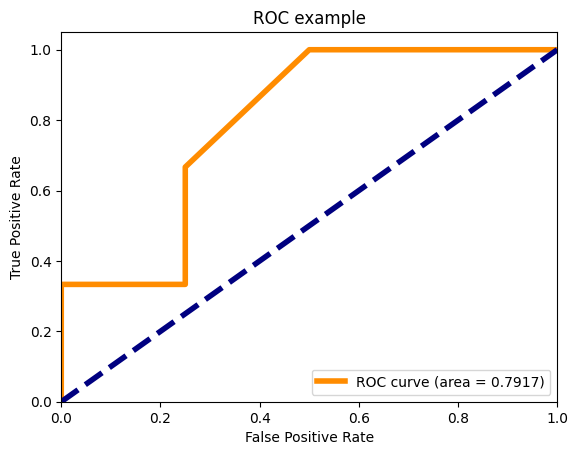

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df["class"], df["score"])
roc_auc = roc_auc_score(df["class"], df["score"])

import matplotlib.pyplot as plt

plt.figure()
lw = 4  # line width

plt.plot(
    fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.4f)" % roc_auc
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC example")
plt.legend(loc="lower right")

plt.show()

In [ ]:
for t in list(thresholds):
    TP = df[(df["score"] >= t) & (df["class"] == 1)]["id"].count()
    TN = df[(df["score"] < t) & (df["class"] == 0)]["id"].count()
    FP = df[(df["score"] >= t) & (df["class"] == 0)]["id"].count()
    FN = df[(df["score"] < t) & (df["class"] == 1)]["id"].count()
    TP_rate = TP / (TP + FN)
    FP_rate = FP / (TN + FP)
    print(f" Threshold: {t} TP Rate: {TP_rate:6f} FP Rate: {FP_rate}")

 Threshold: inf TP Rate: 0.000000 FP Rate: 0.0
 Threshold: 0.6 TP Rate: 0.333333 FP Rate: 0.0
 Threshold: 0.5 TP Rate: 0.333333 FP Rate: 0.25
 Threshold: 0.3 TP Rate: 0.666667 FP Rate: 0.25
 Threshold: 0.2 TP Rate: 1.000000 FP Rate: 0.5
 Threshold: 0.0 TP Rate: 1.000000 FP Rate: 1.0


In [ ]:
tpr, fpr

(array([0.        , 0.33333333, 0.33333333, 0.66666667, 1.        ,
        1.        ]),
 array([0.  , 0.  , 0.25, 0.25, 0.5 , 1.  ]))

Но вообще есть `plot_roc_curve` и вот такое

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


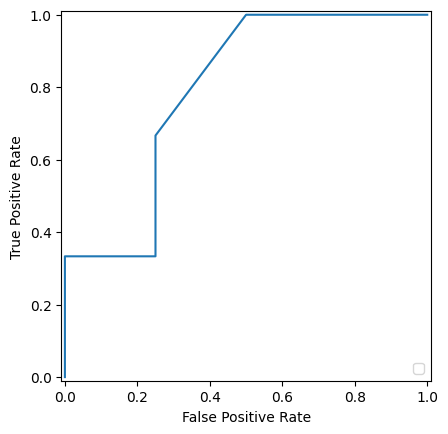

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

#### Кстати, покажите что ROC-кривая монотонна для любых данных и моделей.

...

### Precision-Recall curve

Другая кривая, в которой изменяется соотношение Precision к Recall.

Упражнение: обязательно ли эта кривая будет монотонной?

Ответ: нет, кривая не будет монотонной. Хоть при снижении порога recall неубывает, но precision может как расти, так и падать, в зависимости от того, насколько точны новые добавленные положительные предсказания

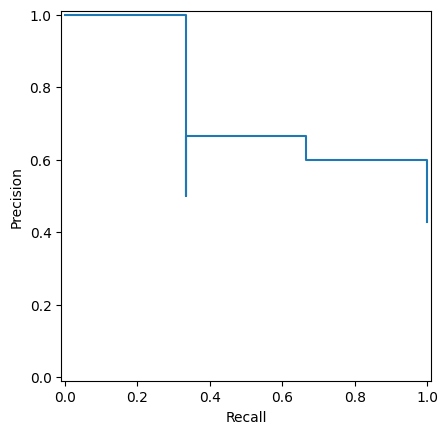

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(df["class"], df["score"])

precision, recall, thresholds

pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

Метрика, суммаризующая эту кривую, называется **Average Precision (AP)**. Кстати, это очень популярная метрика в задачах сегментации изображений и object detection.

Формально, здесь вообще не будет тресхолда: поскольоку recall монотонен по тресхолду, можнго думать про эту кривую как про функцию Precision(recall). $$AP = \int\limits_0^1 Precision(r)dr = \int\limits_0^1 Precision(t)\frac{\partial Recall(t)}{\partial t} dt$$


**Упражнение.**
* Какова worst-case сложность подсчета этой метрики наивно(т. е. варьируем тресхолд, считаем Precision, Recall и потом усредняем)?
* А как посчитать за $O(N \log N)$, где N-число точек данных?

Ответ:
- Мы перебираем все M порогов, где обычно M ~ N, для каждого считая precision и recall (проход по всем N данным), итоговая сложность $O(M\times N)\approx O(N^2)$
- Можно отсортировать объекты по предсказанным вероятностям ($O(N \log N)$), пройти один раз по отсортированным данным, обновляя TP, FP, Presicion, Recall ($O(N)$), интегрировать кривую PR (тоже $O(N)$). Итоговая сложность $O(N \log N) + O(N) = O(N \log N)$

# И ещё раз, без спешки

Самое крупное кораблекрушение Европы в мирное время, в предполагаемых причинах которого до сих пор нет окончательной уверенности.

```
«Estonia» (ранее «Viking Sally», «Silja Star», «Wasa King») —
эстонский паром судоходной компании «Estline», построенный
в 1979 году в ФРГ на судоверфи «Meyer Werft» в Папенбурге.
Затонул в Балтийском море в ночь с 27 на 28 сентября 1994 года,
в результате крушения пропали без вести 757 человек и
погибли 95 человек (всего 852) из 989 находившихся
на борту пассажиров и членов экипажа. Это крупнейшее
в Европе кораблекрушение в мирное время.
```

Датасет можно скачать [тут](https://www.kaggle.com/datasets/christianlillelund/passenger-list-for-the-estonia-ferry-disaster)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(
    "christianlillelund/passenger-list-for-the-estonia-ferry-disaster"
)

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download(
    "christianlillelund/passenger-list-for-the-estonia-ferry-disaster"
)

print("Path to dataset files:", path)

100%|██████████| 14.1k/14.1k [00:00<00:00, 18.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/christianlillelund/passenger-list-for-the-estonia-ferry-disaster/versions/1


Using Colab cache for faster access to the 'passenger-list-for-the-estonia-ferry-disaster' dataset.
Path to dataset files: /kaggle/input/passenger-list-for-the-estonia-ferry-disaster


In [ ]:
!cp /kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv /content/estonia-passenger-list.csv

In [ ]:
import pandas as pd

all_data = pd.read_csv("estonia-passenger-list.csv")
all_data.head(2)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [ ]:
all_data["PassengerId"] = all_data["PassengerId"].astype("category")

In [ ]:
all_data.describe()

,Age,Survived
count,989.000000,989.000000
mean,44.575329,0.138524
std,17.235146,0.345624
min,0.000000,0.000000
25%,30.000000,0.000000
50%,44.000000,0.000000
75%,59.000000,0.000000
max,87.000000,1.000000


In [ ]:
all_data["Country"].value_counts()

,count
Country,
Sweden,550
Estonia,344
Latvia,28
Finland,16
Russia,14
Norway,9
Germany,8
Denmark,6
Lithuania,4


In [ ]:
anonymized_data = all_data.drop(["Firstname", "Lastname", "PassengerId"], axis=1)
anonymized_data.head(1)

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0


In [ ]:
y = anonymized_data["Survived"]
y.value_counts()

,count
Survived,
0,852
1,137


In [ ]:
anonymized_data[anonymized_data["Country"] == "Russia"]

,Country,Sex,Age,Category,Survived
46,Russia,M,49,P,0
120,Russia,M,25,P,0
396,Russia,F,40,C,0
408,Russia,M,49,P,0
413,Russia,M,24,P,0
531,Russia,M,52,C,0
532,Russia,F,39,C,0
542,Russia,M,25,P,0
685,Russia,F,37,C,0
690,Russia,M,37,P,0


NameError: name 'plt' is not defined

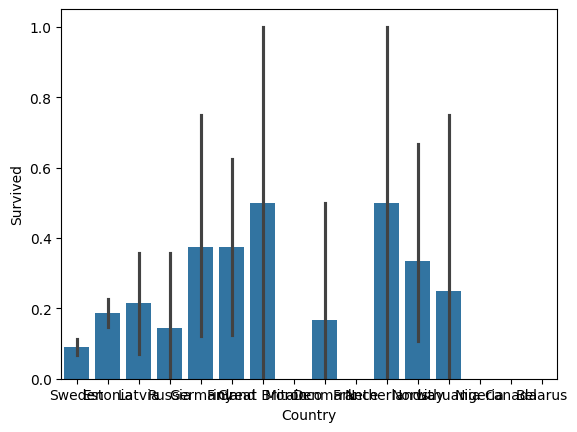

In [ ]:
import seaborn as sns

# нарисуем среднюю выживаемость и дисперсию
sns.barplot(x="Country", y="Survived", data=anonymized_data)

# Поворот  подписей
plt.xticks(rotation=70)
plt.tight_layout()

In [ ]:
# Зависит ли выживаемость от категории Пассажиры/Passengers; Команда/Сrew
sns.barplot(x="Category", y="Survived", data=anonymized_data)

In [ ]:
anonymized_data["Category"].value_counts()

А как распределён возраст?

Можно посмотреть встроенными средствами pandas:

In [ ]:
anonymized_data["Age"].hist()

# Подготовка данных

#### Dummy-coding AKA One-Hot-Encoding

Но чаще всё-таки удобнее кодировать средствами sklearn, увидим ниже.

In [ ]:
countries = pd.get_dummies(anonymized_data["Country"], prefix="c")
countries

,c_Belarus,c_Canada,c_Denmark,c_Estonia,c_Finland,c_France,c_Germany,c_Great Britain,c_Latvia,c_Lithuania,c_Morocco,c_Netherlands,c_Nigeria,c_Norway,c_Russia,c_Sweden
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
986,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Сами разобьём на обучающую и тестовую выборки -- до всех предобработок, это важно!

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data_train, data_test, y_train, y_test = train_test_split(
    anonymized_data.drop(["Survived"], axis=1),  # X
    anonymized_data["Survived"],  # y
    test_size=0.3,  # доля от всех записей
    random_state=1337,  # зерно
    stratify=anonymized_data["Survived"],  # а это что?
)

# print(data_train.shape, y_train.shape, data_test.shape, y_test.shape)

# np.sum(y_train) / y_train.shape[0], np.sum(y_test) / y_test.shape[0]
# nonames_data.shape, data_train.shape
# y_train, y_test
# y_train.value_counts()

In [ ]:
data_train.head(2)

,Country,Sex,Age,Category
784,Sweden,M,61,P
36,Sweden,M,70,P


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import sparse as sp


# Не все классификаторы умеют обращаться с категориальными признаками.
def prepare_features_for_logreg(data: pd.DataFrame, cat_encoder=None, real_scaler=None):
    cat_columns = ["Country", "Sex", "Category"]
    real_columns = ["Age"]

    # categorical features
    if cat_encoder is None:
        ohe = OneHotEncoder(handle_unknown="ignore")
        ohe.fit(data[cat_columns])
    else:
        ohe = cat_encoder
    X_cat = ohe.transform(data[cat_columns])
    cat_fnames = ohe.get_feature_names_out(cat_columns)

    # real-valued features
    if real_scaler is None:
        stsc = StandardScaler()
        stsc.fit(data[real_columns])
    else:
        stsc = real_scaler
    X_real = stsc.transform(data[real_columns])
    feature_matrix = sp.hstack([X_cat, X_real])

    return feature_matrix, list(cat_fnames) + real_columns, ohe, stsc


X_train_sparse, fnames_sparse, encoder_sparse, scaler = prepare_features_for_logreg(
    data_train
)
X_test_sparse, _, _, _ = prepare_features_for_logreg(data_test, encoder_sparse, scaler)

X_train_sparse.shape, X_test_sparse.shape
# X_train_sparse.todense()
# X_test_sparse.todense()

((692, 20), (297, 20))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

clf_linear = LogisticRegression(
    C=0.99, class_weight="balanced", solver="saga", penalty="l1"
)
clf_linear.fit(X_train_sparse, y_train)

y_pred_train = clf_linear.predict(X_train_sparse)
y_pred_test = clf_linear.predict(X_test_sparse)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
# clf_linear.coef_

              precision    recall  f1-score   support

           0       0.94      0.69      0.79       596
           1       0.28      0.75      0.41        96

    accuracy                           0.70       692
   macro avg       0.61      0.72      0.60       692
weighted avg       0.85      0.70      0.74       692

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       256
           1       0.31      0.76      0.44        41

    accuracy                           0.73       297
   macro avg       0.63      0.74      0.63       297
weighted avg       0.86      0.73      0.77       297



<Axes: >

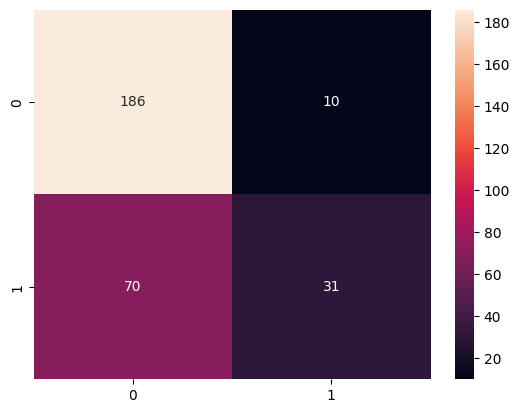

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_test, y_test

sns.heatmap(confusion_matrix(y_pred_test, y_test), annot=True, fmt="g")

Хороший способ проверить, не ерунду ли мы сделали: внимание на **accuracy** и на метрики в разделе **macro-averaged**

In [ ]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy="most_frequent").fit(X_train_sparse, y_train)
y_pred = clf_dummy.predict(X_test_sparse)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       256
           1       0.00      0.00      0.00        41

    accuracy                           0.86       297
   macro avg       0.43      0.50      0.46       297
weighted avg       0.74      0.86      0.80       297



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Подготовим признаки для логических классификаторов -- там обычно можно без разреженных признаков и нормализации

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from scipy import sparse as sp


def prepare_features_for_logic(data: pd.DataFrame, cat_encoder=None):

    cat_columns = ["Country", "Sex", "Category"]
    real_columns = ["Age"]

    # categorical features
    if cat_encoder is None:
        oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        oe.fit(data[cat_columns])
    else:
        oe = cat_encoder

    X_cat = oe.transform(data[cat_columns])
    mapped_cat_values = oe.categories_
    cat_fnames = cat_columns

    # real-valued features

    # todo: вообще очень часто есть смысл отбросить из обучающей выборки примеры,
    #       значения которых редки (например, выпадающие далеко "за три сигмы")

    X_real = data[real_columns].values
    feature_matrix = np.hstack([X_cat, X_real])  # note: `np` for dense Numpy matrices

    return feature_matrix, list(cat_fnames) + real_columns, oe, mapped_cat_values


X_train_dense, fnames_dense, encoder, mapped_cat_values = prepare_features_for_logic(
    data_train
)
X_test_dense, _, _, _ = prepare_features_for_logic(data_test, encoder)


X_train_dense.shape, X_test_dense.shape

mapped_cat_values
X_train_dense

array([[14.,  1.,  1., 61.],
       [14.,  1.,  1., 70.],
       [14.,  1.,  1., 43.],
       ...,
       [14.,  1.,  0., 36.],
       [14.,  1.,  1., 50.],
       [14.,  0.,  1., 69.]])

In [ ]:
data_train.head(0)

,Country,Sex,Age,Category


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight="balanced").fit(X_train_dense, y_train)
y_pred = clf.predict(X_test_dense)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       256
           1       0.28      0.46      0.35        41

    accuracy                           0.76       297
   macro avg       0.59      0.64      0.60       297
weighted avg       0.82      0.76      0.78       297



In [ ]:
sum(clf.feature_importances_)

np.float64(1.0)

Но пока мы даже не попытались настроить модели, результаты ничего не значат.

Кстати, смотрите, как можно.


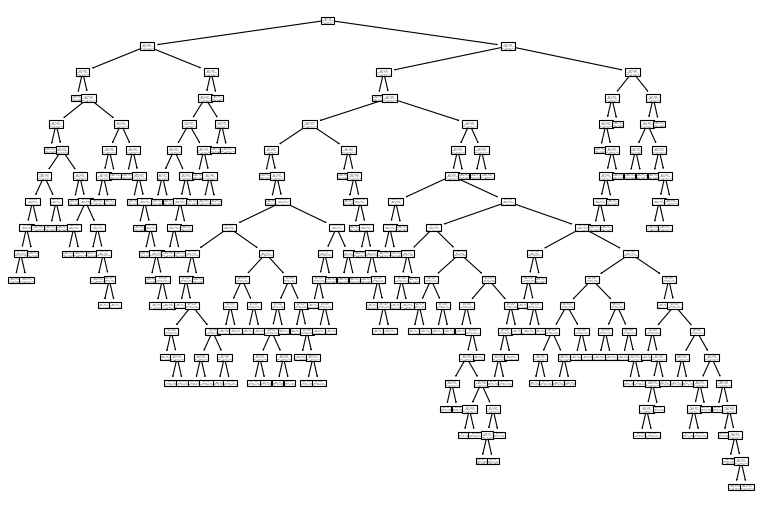

In [ ]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)


plot_tree(
    clf, feature_names=fnames_dense, class_names=["Dead", "Surv"], proportion=True
);

---

# Познакомились с minimum minimorum, поперебираем
попробуем получить результаты получше со случайным лесом

Посмотрим на самые важные параметры.

```
class sklearn.ensemble.RandomForestClassifier(

                        n_estimators=100,  
                            Число деревьев.              
                            
                        criterion='gini',
                            Критерий: индекс Джини либо энтропия, может зависеть от вида дерева
                            
                        max_depth=None,
                            Самая, пожалуй, естественная регуляризация -- ограничение глубины дерева
                            
                        min_samples_split=2,
                            Сколько должно попасть в вершину объектов, чтобы её можно было ветвить дальше
                            
                        min_samples_leaf=1,
                            Очень мощный и важный регуляризатор! Сколько минимум объектов должно быть в листе
                            
                        max_features='auto',
                            Среди какого числа признаков выбираем очередное ветвление
                            
                        max_leaf_nodes=None,
                            Хороший регуляризатор -- ограничение на количество листьев; добавляются по убыванию
                            снижения impurity.
                            
                        min_impurity_decrease=0.0,
                            Порог по уменьшению impurity, который запрещает ветвить дерево дальше.
                        
                        bootstrap=True,
                            Если False, обучаем каждое дерево на всём наборе данных.
                            Если True, только на части, размер которой задан в max_samples.
                            
                        n_jobs=None,
                            На сколько job-ов распараллелить.
                            
                        random_state=None,
                            Ну, тут всё понятно: случайный seed, позволяющий воспроизводить результаты.
                        
                        verbose=0,
                            Степень подробности протоколирования хода обучения и всего такого. Обычно 0,1,2.
                            
                        warm_start=False,
                            Это такая возможность переиспользовать обученный ансамбль для последующих задач.
                             
                        max_samples=None
                            Сколько максимум сэмплов брать из датасета для обучения очередного дерева, если bootstrap
                        )
```

In [ ]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "min_samples_leaf": [1, 2, 3, 5],
    "max_samples": [0.3, None],
    "class_weight": ["balanced", "balanced_subsample"],
}
param_grid

{'n_estimators': [10, 50, 100],
 'min_samples_leaf': [1, 2, 3, 5],
 'max_samples': [0.3, None],
 'class_weight': ['balanced', 'balanced_subsample']}

In [ ]:
y_train.shape, y_test.shape, type(y_train)

((692,), (297,), pandas.core.series.Series)

### Упражнение
Зачем нужен KFold? Почему нельзя просто считать метрики на тесте?


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

kfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)

print(y_train.values.mean())

for array1, array2 in kfold.split(X_train_dense, y_train):
    x_train_cv = X_train_dense[array1]
    y_train_cv = np.array(y_train)[list(array1)]

    x_test_cv = X_train_dense[array2]
    y_test_cv = np.array(y_train)[list(array2)]

    print(y_train_cv.mean(), y_test_cv.mean())

0.13872832369942195
0.13882863340563992 0.13852813852813853
0.13882863340563992 0.13852813852813853
0.13852813852813853 0.1391304347826087


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

scores = ["accuracy"]

for score in scores:
    print("# Tuning for %s" % score)
    print()

    clf = GridSearchCV(
        RandomForestClassifier(n_jobs=-1, random_state=100),
        param_grid,
        scoring=score,
        verbose=1,
        cv=3,
    )

    clf.fit(X_train_dense, y_train)

    print("Best params on dev set:")
    print(clf.best_params_)

    print("Scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]

    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    best_model = clf.best_estimator_
    best_model.fit(X_train_dense, y_train)

    y_true, y_pred = y_test, best_model.predict(X_test_dense)

    print(classification_report(y_true, y_pred))
    print()

# Tuning for accuracy

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best params on dev set:
{'class_weight': 'balanced_subsample', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 100}
Scores on development set:
0.828 (+/-0.032) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 10}
0.834 (+/-0.004) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 50}
0.835 (+/-0.001) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 100}
0.782 (+/-0.029) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 10}
0.798 (+/-0.026) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 50}
0.798 (+/-0.021) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
0.737 (+/-0.034) for {'class_weight': 'balanced', 'max_samples': 0.3, 'min_sample

---
## Укладываем вообще всё в один пайплайн
---
Результаты вряд ли будут впечатляющими, но на этом примере посмотрим, как можно удобно запрограммировать перебор параметров не только классификации.

Понизим размерность и применим KNN.

Вариантов понижения размерности [много](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition). Возьмём самый стандартный и работающий с разреженными признаками.

In [ ]:
from sklearn.decomposition import TruncatedSVD

decomposer = TruncatedSVD(n_components=6, random_state=10, n_iter=200)
X_train_svd = decomposer.fit_transform(X_train_sparse)
X_test_svd = decomposer.transform(X_test_sparse)

X_train_svd.shape, X_test_svd.shape, X_train_sparse.shape, X_train_svd

((692, 6),
 (297, 6),
 (692, 20),
 array([[ 1.73982846,  0.54471297, -0.77363292,  0.1279437 ,  0.17490623,
         -0.03082302],
        [ 1.87754394,  0.98731673, -0.80134845,  0.37172317,  0.10983215,
         -0.00622474],
        [ 1.46439751, -0.34049454, -0.71820188, -0.35961525,  0.3050544 ,
         -0.08001957],
        ...,
        [ 0.75965627, -0.77882281, -0.4720636 ,  0.22569799,  1.32923874,
          0.07330404],
        [ 1.57150955,  0.00375283, -0.7397584 , -0.17000899,  0.25444122,
         -0.06088758],
        [ 1.89473915,  1.06498173,  0.59063807,  0.20397263, -0.06326477,
          0.01816823]]))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[("svd", decomposer), ("knn", knn)])

In [ ]:
param_grid = [
    {
        "svd__n_components": [2, 4, 6, 10],
        "svd__n_iter": [5, 100, 1000],
        "knn__n_neighbors": [1, 2, 3, 4, 5],
        "knn__weights": ["uniform", "distance"],
        "knn__metric": ["euclidean"],
    }
]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

scores = ["f1_macro"]  # , "accuracy"]

for score in tqdm(scores):
    print("# Tuning for %s" % score)
    print()

    clf = GridSearchCV(pipe, param_grid, scoring=score, verbose=2, cv=3)
    clf.fit(X_train_sparse, y_train)

    print("Best params on dev set:")
    print(clf.best_params_)

    print("Scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]

    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    best_model = clf.best_estimator_
    best_model.fit(X_train_sparse, y_train)

    y_true, y_pred = y_test, best_model.predict(X_test_sparse)

    print(classification_report(y_true, y_pred))
    print()

  0%|          | 0/1 [00:00<?, ?it/s]

# Tuning for f1_macro

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=5; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=5; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=5; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=100; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=100; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=100; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform, svd__n_components=2, svd__n_iter=1000; total time=   0.2s
[C

100%|██████████| 1/1 [00:46<00:00, 46.45s/it]

[CV] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, svd__n_components=10, svd__n_iter=1000; total time=   0.3s
Best params on dev set:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 100}
Scores on development set:
0.579 (+/-0.068) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 5}
0.582 (+/-0.072) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 100}
0.581 (+/-0.070) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 2, 'svd__n_iter': 1000}
0.520 (+/-0.024) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components': 4, 'svd__n_iter': 5}
0.517 (+/-0.012) for {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'svd__n_components'

In [ ]:
clf.best_estimator_

Pipeline(steps=[('svd', TruncatedSVD(n_iter=100, random_state=10)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      n_neighbors=1))])

# Задача 5. Паром (1 балл).

Получите accuracy > 0.89 на тестовом датасете. Можно пользоваться любым классификатором **из sklearn**. Ансамблями пользоваться можно.

### XtreemeGradientBoosting и нейронные сети запрещены.

# Задача 6. Линрег (1 балл)

Допустим, у вас есть два множества **A** и **B** точек на плоскости. Линейная регрессия на плоскости -- это
просто прямая, ее можно представить как функцию $ y = ax + b$.

Линейная регрессия, обученная на множестве **А**, имеет коэффициент **$a > 0$**. То же самое верно и для линейной регрессии, обученной на множестве **B**. Правда ли, что если обучить линейную регрессию на множестве $A \cup B$, то у полученной прямой коэффициент **a** будет больше 0?

Если да -  докажите, если нет - постройте контрпример.